# Explainable machine learning  
A workshop in collaboration with Linjeforeningen for Språkteknologi  
***  

Machine learning has become a powerful tool for predictive data analysis, but modern, state-of-the-art approaches are complex and lack interpretability. In this workshop, we discover how classifiers can be used for data analytics, as well as useful tools to gain extensive insights in data patterns and model decision rules. We will use explaination techniques for both simple and more complex models. 

***  
Required dependencies are in `Requirements.txt`  
We install them using pip (alternatively, you can use conda)

In [1]:
#!pip3 install -r Requirements.txt

In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import *
import sklearn.linear_model
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [3]:
wine_dataset = pd.read_csv("data/wine_dataset.csv")

In [4]:
wine_dataset

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine Type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,One
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,One
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,One
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,One
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,Three
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,Three
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,Three
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,Three


In [5]:
target_attr = "Wine Type"
features, targets = wine_dataset.drop(target_attr, axis=1), wine_dataset[target_attr]
features

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [6]:
targets

0        One
1        One
2        One
3        One
4        One
       ...  
173    Three
174    Three
175    Three
176    Three
177    Three
Name: Wine Type, Length: 178, dtype: object

In [7]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    features, targets
)

In [8]:
lr = linear_model.LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
pd.DataFrame(sklearn.metrics.classification_report(y_test, y_pred, output_dict=True))

,One,Three,Two,accuracy,macro avg,weighted avg
precision,0.894737,1.000000,0.909091,0.933333,0.934609,0.935991
recall,1.000000,0.937500,0.833333,0.933333,0.923611,0.933333
f1-score,0.944444,0.967742,0.869565,0.933333,0.927251,0.932760
support,17.000000,16.000000,12.000000,0.933333,45.000000,45.000000


In [9]:
def plot_coefs(class_index):
    c = class_index
    pd.Series(lr.coef_[c], index=features.columns).plot.barh(title=f"Feature impacts on class {lr.classes_[c]}")

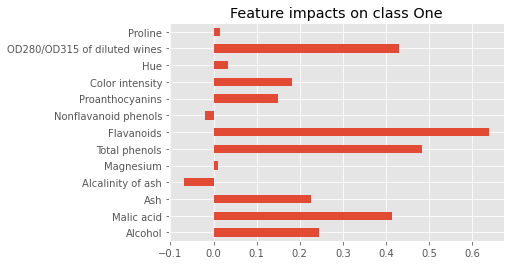

In [10]:
plot_coefs(0)

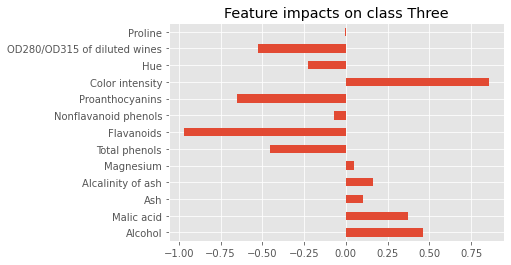

In [11]:
plot_coefs(1)

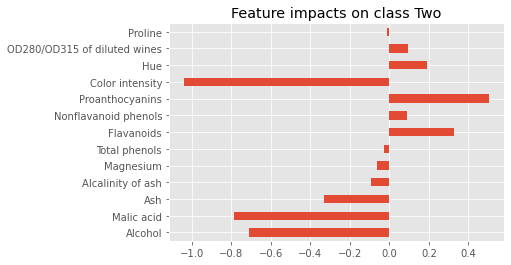

In [12]:
plot_coefs(2)

In [13]:
lr.classes_

array(['One', 'Three', 'Two'], dtype=object)

In [14]:
def sort_col_coef(cols, coefs) -> pd.Series:
    """Takes in data attributes with corresponding model coefficients
    And sorts them both according to absolute values of coefficients"""
    cols = np.asarray(cols)
    perm = np.argsort(-np.abs(coefs))
    return cols[perm], coefs[perm]

sort_col_coef(wine_dataset.columns, lr.coef_[0])

(array(['Flavanoids', 'Total phenols', 'OD280/OD315 of diluted wines',
        'Malic acid', 'Alcohol', 'Ash', 'Color intensity',
        'Proanthocyanins', 'Alcalinity of ash', 'Hue',
        'Nonflavanoid phenols', 'Proline', 'Magnesium'], dtype=object),
 array([ 0.63813061,  0.48344213,  0.43092003,  0.41369976,  0.24420655,
         0.22561164,  0.1815572 ,  0.14866289, -0.06788837,  0.03325848,
        -0.01900265,  0.0146092 ,  0.0097201 ]))

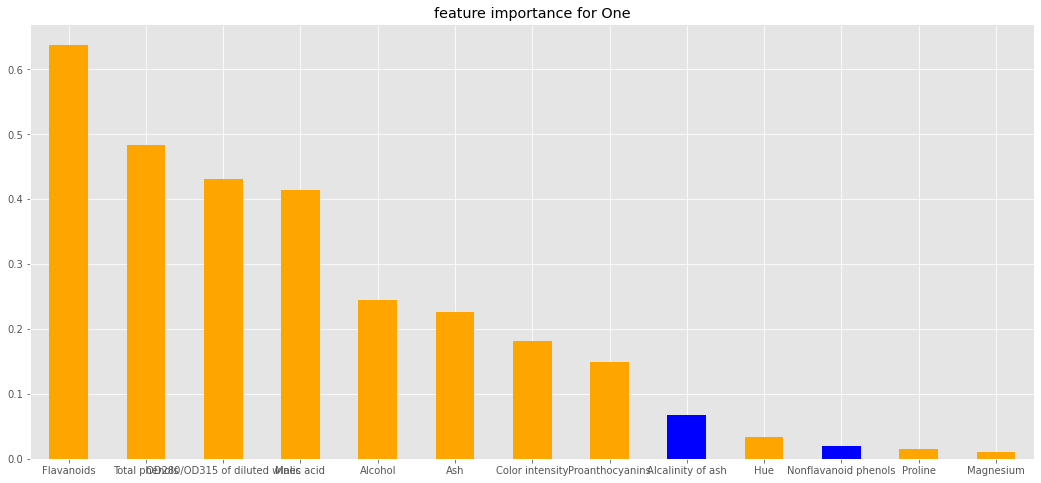

In [15]:
def plot_coefs2(class_index):
    cols, coefs = sort_col_coef(wine_dataset.columns, lr.coef_[class_index])
    colors = ['orange' if i > 0 else 'blue' for i in coefs]
    coefs = np.abs(coefs)
    pd.Series(coefs, index=cols).plot.bar(
        title=f'feature importance for {lr.classes_[class_index]}', 
        color=colors, 
        figsize=(18, 8), 
        rot=0
    )
    
plot_coefs2(0)

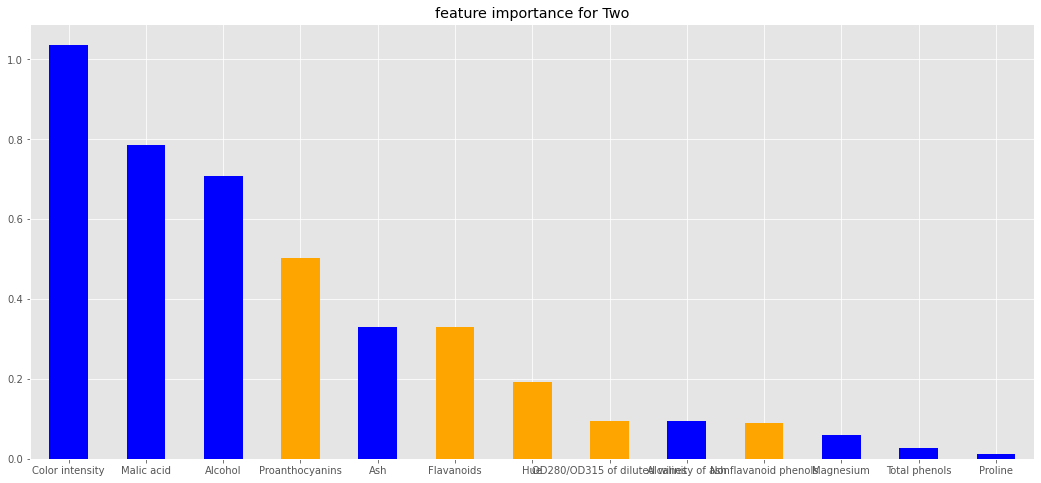

In [16]:
plot_coefs2(2)

## (simple) Robots love sterotyping  



## Investigating models

## Using shap

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

shap.initjs()

NameError: name 'shap' is not defined

In [ ]:
corpus,y = shap.datasets.imdb()
corpus_train, corpus_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=7)

vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(corpus_train).toarray() # sparse also works but Explanation slicing is not yet supported
X_test = vectorizer.transform(corpus_test).toarray()

In [ ]:
model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X_train, y_train)

In [ ]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

In [ ]:
shap.plots.beeswarm(shap_values)#, X_test_array, feature_names=vectorizer.get_feature_names())

In [ ]:
ind = 0
shap.plots.force(shap_values[ind])

In [ ]:
print("Positive" if y_test[ind] else "Negative", "Review:")
print(corpus_test[ind])